In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from tabulate import tabulate


In [4]:
df=pd.read_csv('weatherHistory.csv')
print(df.describe())
df.info()

       Temperature (C)  Apparent Temperature (C)     Humidity  \
count     12300.000000              12300.000000  12300.00000   
mean         10.619686                  9.443532      0.75145   
std           9.708280                 10.892550      0.18453   
min         -14.088889                -22.094444      0.15000   
25%           2.688889                  0.222222      0.63000   
50%          10.044444                 10.044444      0.80000   
75%          17.827778                 17.827778      0.90000   
max          37.127778                 38.377778      1.00000   

       Wind Speed (km/h)  Wind Bearing (degrees)  Visibility (km)  Loud Cover  \
count       12300.000000            12300.000000     12300.000000     12300.0   
mean           10.412439              190.496423         9.809895         0.0   
std             6.880948              106.090033         3.930867         0.0   
min             0.000000                0.000000         0.000000         0.0   
25%      

In [5]:
df.dropna(inplace=True)
df = df.select_dtypes(include=['float64', 'int64'])
df.drop(columns='Loud Cover', inplace=True)
df

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13
1,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63
2,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41
4,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51
...,...,...,...,...,...,...,...
12294,2.338889,-0.372222,0.99,9.4668,213.0,5.2164,1017.79
12295,2.466667,-0.122222,0.99,9.0965,202.0,5.5384,1018.42
12296,2.316667,-0.377778,0.99,9.3863,204.0,4.2987,1018.41
12297,2.966667,0.905556,0.99,7.5187,177.0,4.7495,1019.08


In [6]:
features = df.drop('Temperature (C)', axis=1)
labels = df['Temperature (C)']
features = pd.get_dummies(features, drop_first=True)

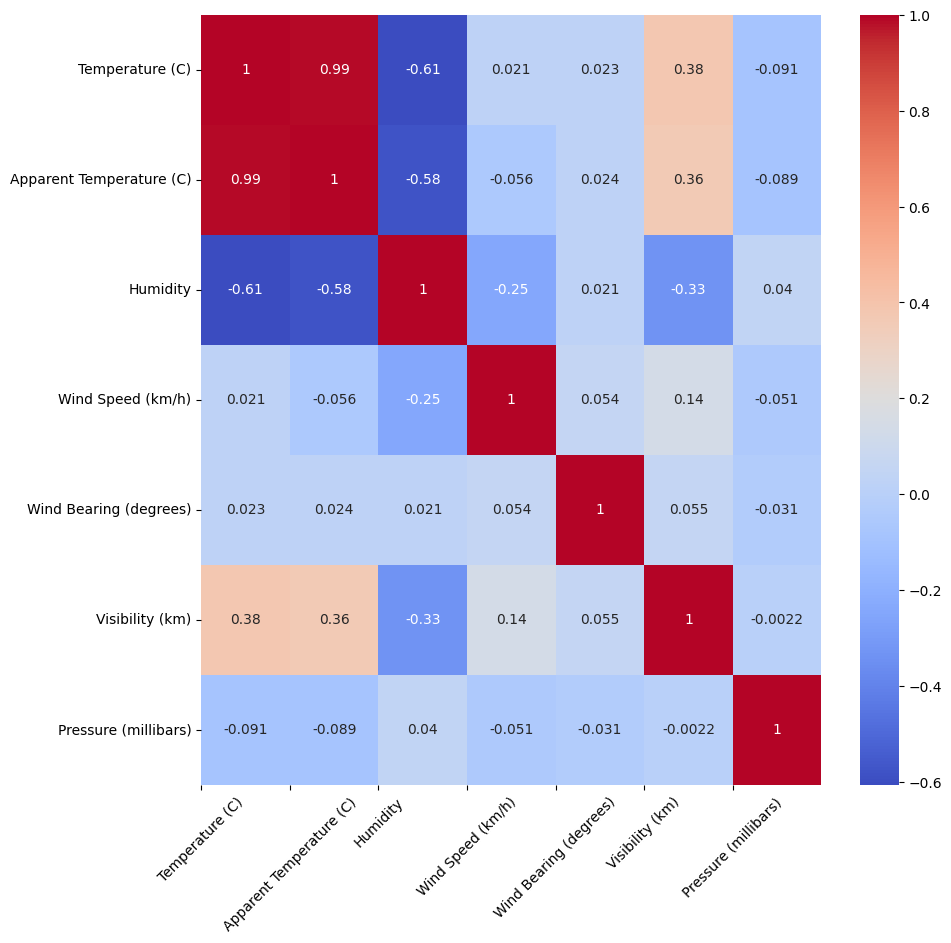

In [7]:
plt.figure(figsize=(10 ,10))
corr = df.corr()
sns.heatmap(corr, annot = True, cmap='coolwarm')
plt.xticks(range(len(corr.columns)), corr.columns, rotation=45)
plt.show()

In [8]:




def regress_and_evaluate(features, labels, plot_title='Regression Results'):


    X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

    regressors = {
        'Linear Regression': LinearRegression(),
        'Decision Tree': DecisionTreeRegressor(random_state=42),
        'KNN': KNeighborsRegressor(n_neighbors=5),
        'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
        'Gradient Boosting': GradientBoostingRegressor(random_state=42),
        'AdaBoost': AdaBoostRegressor(n_estimators=100, random_state=42)
    }

    results = []
    for name, reg in regressors.items():
        reg.fit(X_train, y_train)
        y_pred = reg.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        results.append([name, mse, r2])


    headers = ["Algorithm", "Mean Squared Error", "R^2 Score"]
    print(tabulate(results, headers=headers, tablefmt="grid"))

    plot_results([result[0] for result in results], [result[1:] for result in results], plot_title)

def plot_results(algorithms, metrics, plot_title):
    mse = [metric[0] for metric in metrics]
    r2_scores = [metric[1] for metric in metrics]
    colors = plt.cm.get_cmap('Set3', len(algorithms))

    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    bars = plt.bar(algorithms, mse, color=colors(range(len(algorithms))))
    plt.xlabel('Algorithm')
    plt.ylabel('Mean Squared Error')
    plt.title(f'{plot_title} - MSE')
    plt.xticks(rotation=45, ha='right')
    plt.ylim(0, max(mse))
    legend_labels = [f'{name} - {mse_val:.2f}' for name, mse_val in zip(algorithms, mse)]
    plt.legend(bars, legend_labels, loc='upper right')

    plt.subplot(1, 2, 2)
    bars = plt.bar(algorithms, r2_scores, color=colors(range(len(algorithms))))
    plt.xlabel('Algorithm')
    plt.ylabel('R^2 Score')
    plt.title(f'{plot_title} - R^2 Score')
    plt.xticks(rotation=45, ha='right')
    plt.ylim(min(r2_scores) - 0.1, 1)

    plt.tight_layout()
    plt.show()



+-------------------+----------------------+-------------+
| Algorithm         |   Mean Squared Error |   R^2 Score |
+===================+======================+=============+
| Linear Regression |            0.884827  |    0.990603 |
+-------------------+----------------------+-------------+
| Decision Tree     |            0.0286312 |    0.999696 |
+-------------------+----------------------+-------------+
| KNN               |            2.24592   |    0.976147 |
+-------------------+----------------------+-------------+
| Random Forest     |            0.0113981 |    0.999879 |
+-------------------+----------------------+-------------+
| Gradient Boosting |            0.0422897 |    0.999551 |
+-------------------+----------------------+-------------+
| AdaBoost          |            0.907554  |    0.990361 |
+-------------------+----------------------+-------------+


<ipython-input-8-e584d84454a5>:33: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('Set3', len(algorithms))


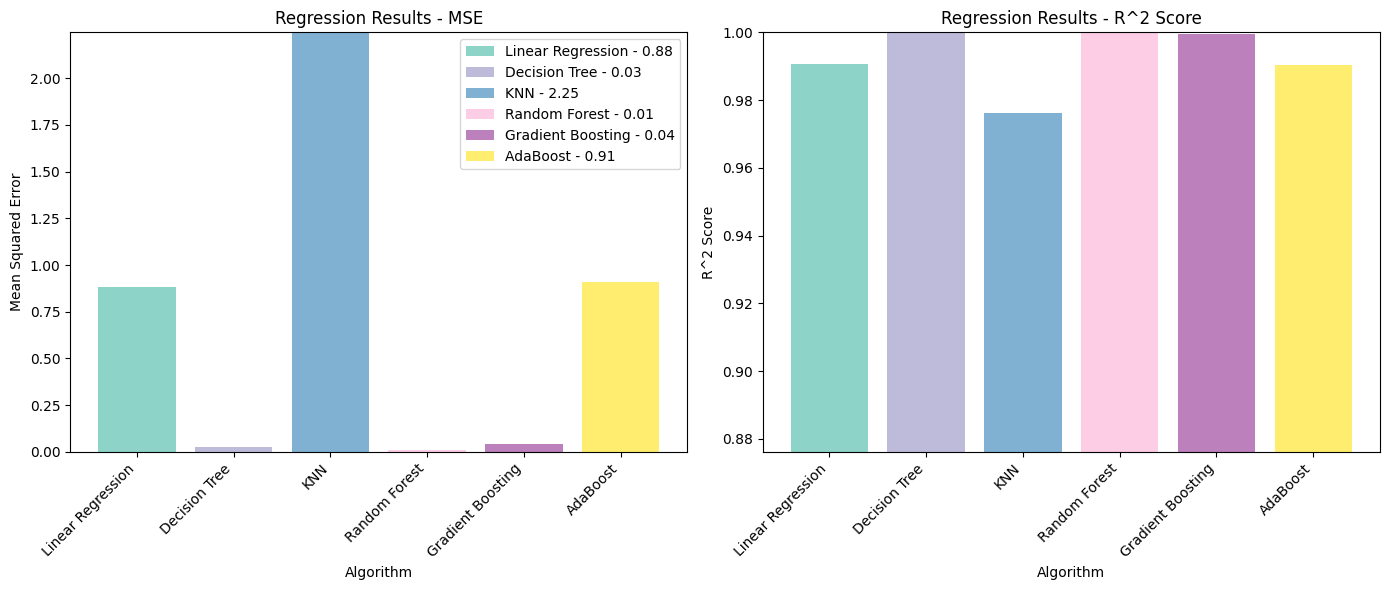

In [11]:
regress_and_evaluate(features, labels)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=0)
regressor = RandomForestRegressor()
regressor.fit(X_train, y_train)

RandomForestRegressor()

In [13]:
y_pred = regressor.predict(X_test)

In [14]:
print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

0.9998741857701132
0.011770127446552238


1. What type of machine learning problem is this?

 -Supervised learning, Regression.


2. How do the features relate to each other and to the
weather conditions?
-Using a heatmap, we can correlate between each variable and the others, just as Task 4.1

3. What are the steps involved in preprocessing the
dataset for machine learning?
-clean the dataset: remove the unwated column, non numerical values, empty columns, then divide the data into features and labels, then into training and test values.


4. How do we select the best model for our dataset? Hint :
use different regression models and compare their
metrics
-By training different models then comparing their R^2 values and mean squared error, we choose the model based on 2 parameters. We choose the model with the highest R^2 value and lowest MSE value.



5. What metrics should we use to evaluate the
performance of our weather prediction model?
-Accuracy, R^2, and MSE


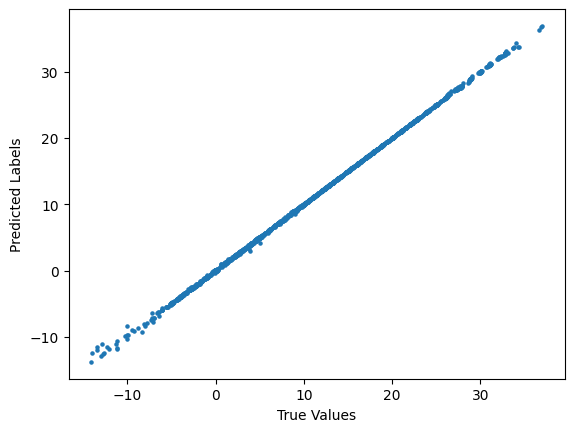

In [16]:
#6. Plot the predicted vs true values
plt.scatter(y_test, y_pred, s = 5)
plt.xlabel('True Values')
plt.ylabel('Predicted Labels')
plt.show()

The Closer the predicted values to the diagonal line, the more accrate they are
